In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.model_selection import train_test_split

# Using a Kaggle dataset
# https://www.kaggle.com/hugodarwood/epirecipes/version/2#

In [2]:
raw_data = pd.read_csv('epi_r.csv')

In [3]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [4]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

There are over 20000 recipes with an average rating of 3.71. The 25th percentile is above the mean, which means there is likely an outlier population. 

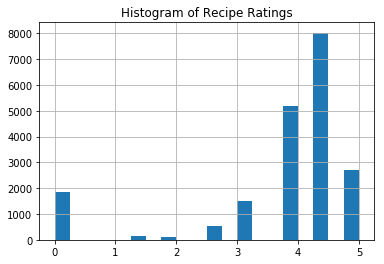

In [7]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

Data is discontinuous.  Clean data some and use SVM Regressor.

In [10]:
# Count nulls
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

For now, we will drop whole columns for calories, protein, fat, and sodium.

In [11]:
#svr = SVR(gamma='auto')
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data.rating
#svr.fit(X, Y)

In [12]:
# Scatter plot comparing actuals to predicted
#plt.scatter(Y, svr.predict(X))

In [13]:
#svr.score(X, Y)

In [14]:
#cross_val_score(svr, X, Y, cv=5)

## And that is your challenge.

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

In [15]:
len(raw_data.columns)

680

In [16]:
sel = VarianceThreshold(threshold=.01)
X_new = sel.fit_transform(X)

X_new_cols = []

for col in range(len(X.columns)):
    if sel.get_support()[col] == True:
        X_new_cols.append(X.columns[col])

len(X_new_cols)

204

In [17]:
df_X = pd.DataFrame(X_new, columns=X_new_cols)

In [18]:
df_X.head()

,alcoholic,almond,appetizer,apple,apricot,arugula,asparagus,avocado,backyard bbq,bacon,...,vegetable,vegetarian,vinegar,walnut,wheat/gluten-free,white wine,winter,yogurt,zucchini,turkey
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
Y.head()

0    2.500
1    4.375
2    3.750
3    5.000
4    3.125
Name: rating, dtype: float64

In [20]:
Y_class = np.where(Y >=4, 0, 1)

In [21]:
Y_class[0:5]

array([1, 0, 1, 0, 1])

In [22]:
print('Percent low rating {:.2f}'.format(sum(Y_class)/len(Y_class)*100))

Percent low rating 46.45


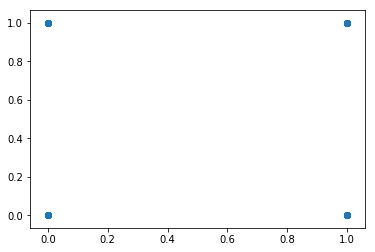

In [24]:
svc = SVC(gamma='auto')
svc.fit(X_new, Y_class)
# Scatter plot comparing actuals to predicted
plt.scatter(Y_class, svc.predict(X_new))

In [25]:
cross_val_score(svc, X_new, Y_class, cv=5)

array([0.59012715, 0.59685864, 0.59536275, 0.59650873, 0.60014966])

In [26]:
y_pred = svc.predict(X_new)
confusion_matrix(Y_class, y_pred)

array([[8239, 2499],
       [5350, 3964]])

The R is higher, but looking at the confusion matrix, this is largely because it is in two classes, and the model is predicting 0's for most of the data.

In [27]:
# Try leaving in the calorie information
no_na = raw_data.dropna()
X_all = no_na.drop(['rating', 'title'], axis=1)
y_all = no_na['rating']
y_all = np.where(y_all == 0, 0, 1)

sel = VarianceThreshold(threshold=.005)
X_new2 = sel.fit_transform(X_all)

X_new2_cols = []

for col in range(len(X_all.columns)):
    if sel.get_support()[col] == True:
        X_new2_cols.append(X_all.columns[col])

print(len(X_new2_cols))
X_new2_df = pd.DataFrame(X_new2, columns=X_new2_cols)


sel_30 = SelectKBest(score_func=f_classif, k=30)
X_30 = sel_30.fit_transform(X_new2_df, y_all)

X_30_cols = []

for col in range(len(X_new2_df.columns)):
    if sel_30.get_support()[col] == True:
        X_30_cols.append(X_new2_df.columns[col])

len(X_30_cols)

295


30

In [28]:
svc = SVC(gamma='auto')
svc.fit(X_30, y_all)

y_pred = svc.predict(X_30)
confusion_matrix(y_all, y_pred)
# Scatter plot comparing actuals to predicted

array([[  112,  1184],
       [   24, 14544]])

In [29]:
cross_val_score(svc, X_30, y_all, cv=5)

array([0.92155009, 0.92373148, 0.92247085, 0.92307692, 0.92181589])

In [30]:
print(X_30_cols)

['alcoholic', 'bake', 'bon appétit', 'brandy', 'cheese', 'chile pepper', 'cocktail', 'cocktail party', 'drink', 'fall', 'fruit juice', 'gin', 'gourmet', 'harpercollins', 'house & garden', 'lime juice', 'liqueur', 'no sugar added', 'non-alcoholic', 'onion', 'peanut free', 'quick & easy', 'rum', 'sauté', 'soy free', 'spirit', 'tea', 'tree nut free', 'vegetable', 'winter']


In [31]:
print('There are {:.3f} percent 0s in the data set.'.format(sum(y_all)/len(y_all)))

There are 0.918 percent 0s in the data set.


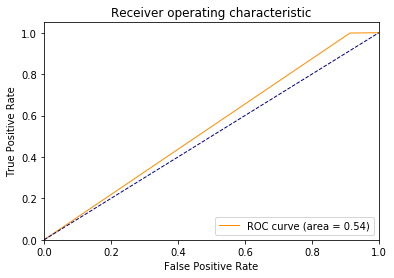

In [32]:
fpr, tpr, thresholds = roc_curve(y_all, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Trying to find more areas to optimize

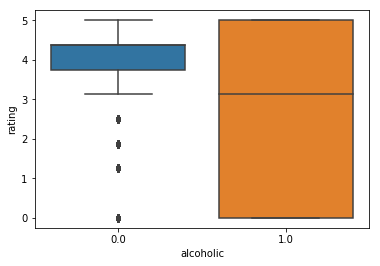

In [33]:
df_plot = no_na[X_30_cols + ['rating']]

ax = sns.boxplot(x='alcoholic', y="rating", data=df_plot)

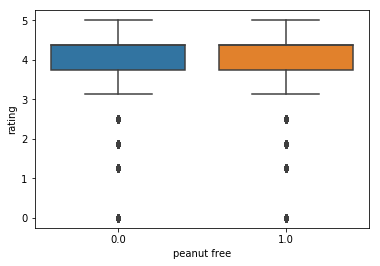

In [34]:
ax = sns.boxplot(x='peanut free', y="rating", data=df_plot)

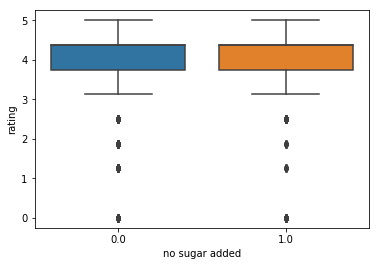

In [35]:
ax = sns.boxplot(x='no sugar added', y="rating", data=df_plot)

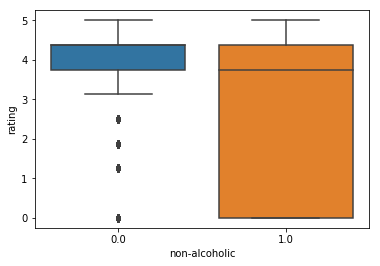

In [36]:
ax = sns.boxplot(x='non-alcoholic', y="rating", data=df_plot)

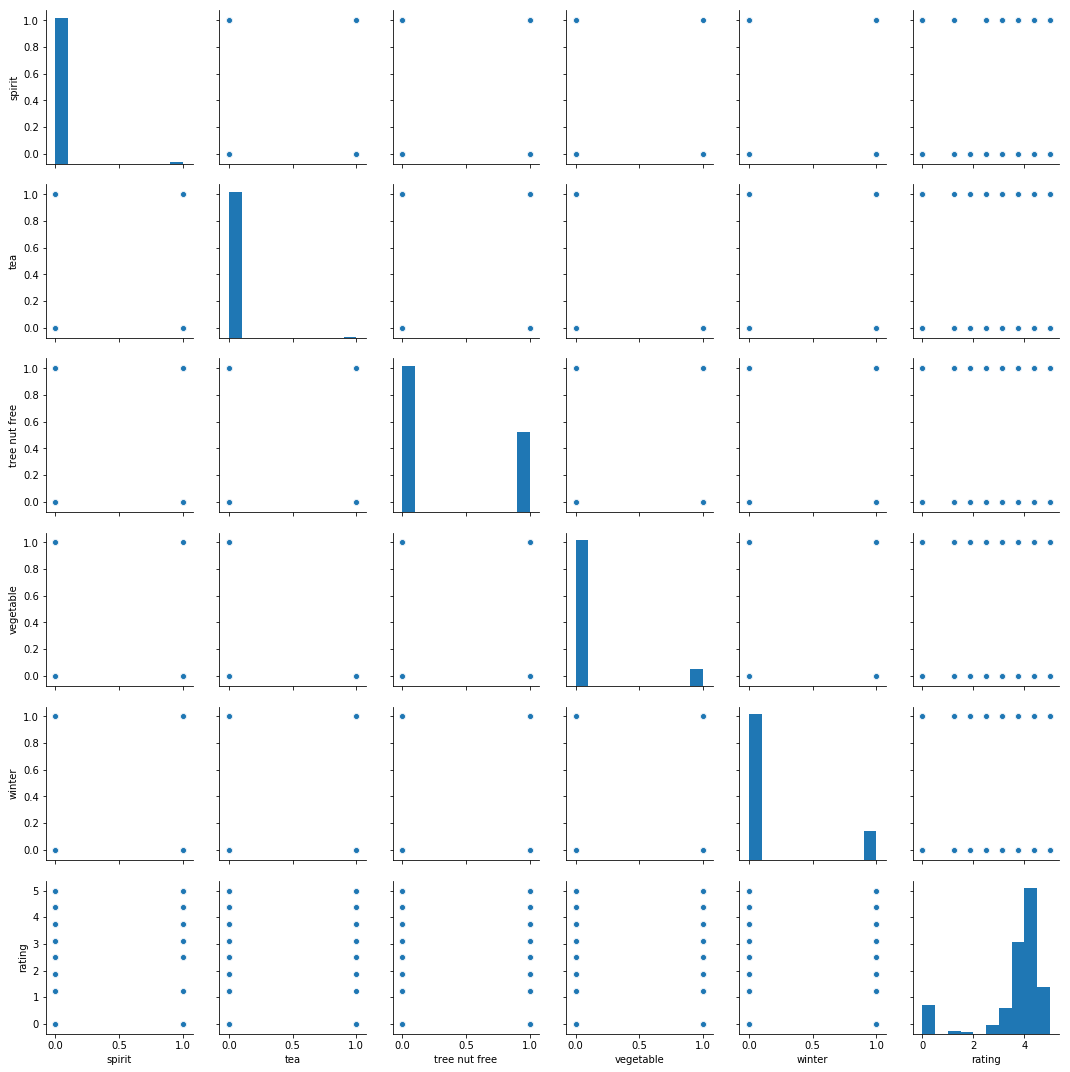

In [37]:
sns.pairplot(df_plot.iloc[:, 25:])

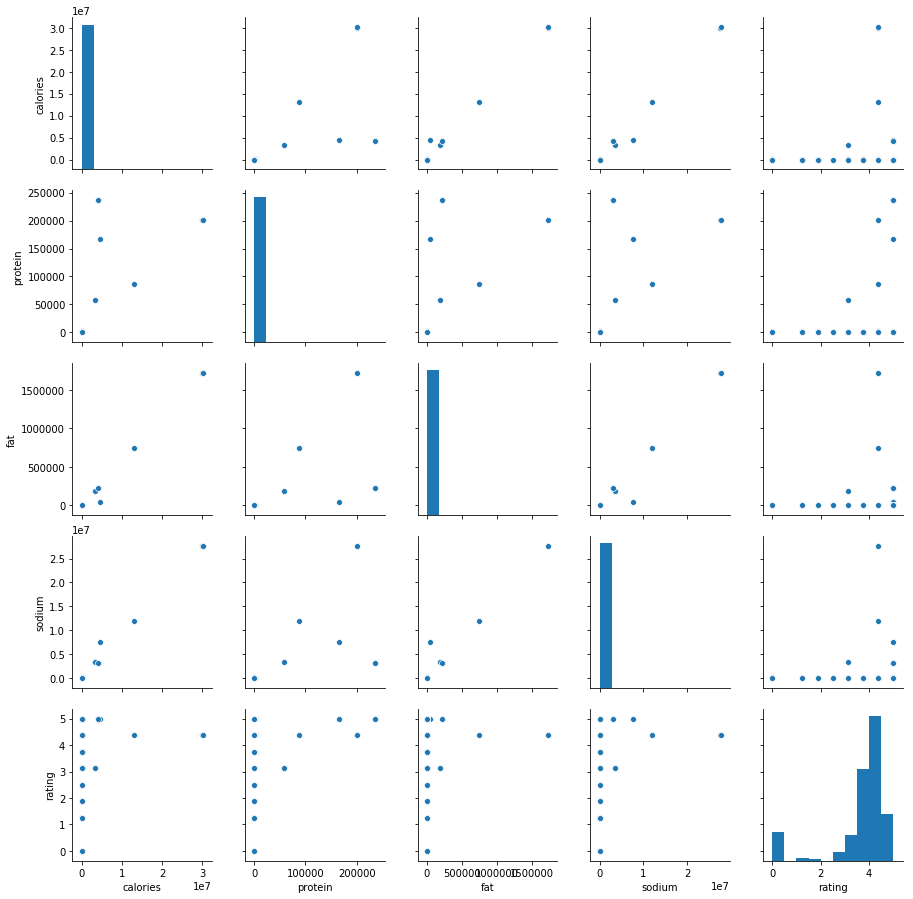

In [38]:
nutritional = raw_data[['calories', 'protein', 'fat', 'sodium', 'rating']]
nutritional.head()
nutritional = nutritional.dropna()

sns.pairplot(nutritional)

In [39]:
nutritional.describe()

,calories,protein,fat,sodium,rating
count,1.586400e+04,15864.000000,1.586400e+04,1.586400e+04,15864.000000
mean,6.350683e+03,100.324571,3.469868e+02,6.252742e+03,3.760952
std,3.598484e+05,3843.462312,2.045933e+04,3.340421e+05,1.285518
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.990000e+02,3.000000,7.000000e+00,8.200000e+01,3.750000
50%,3.330000e+02,8.000000,1.700000e+01,2.960000e+02,4.375000
75%,5.872500e+02,27.000000,3.300000e+01,7.130000e+02,4.375000
max,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,5.000000


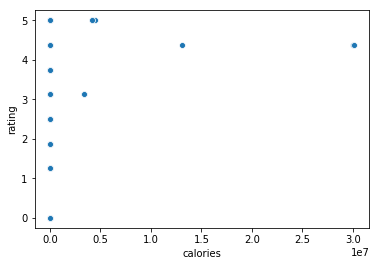

In [40]:
sns.scatterplot(nutritional['calories'], nutritional['rating'], x_jitter=.1, y_jitter=.1)

In [41]:
nutritional[nutritional['calories']>1000000]

,calories,protein,fat,sodium,rating
1304,4157357.0,236489.0,221495.0,3134853.0,5.000
2976,4518216.0,166471.0,44198.0,7540990.0,5.000
5138,3358029.0,58324.0,186642.0,3449373.0,3.125
6368,29997918.0,200210.0,1716279.0,27570999.0,4.375
6912,3358273.0,58334.0,186660.0,3449512.0,3.125
9731,4157357.0,236489.0,221495.0,3134853.0,5.000
11391,30111218.0,200968.0,1722763.0,27675110.0,4.375
19672,13062948.0,87188.0,747374.0,12005810.0,4.375


In [42]:
nutritional2 = nutritional[nutritional['calories']<30000]

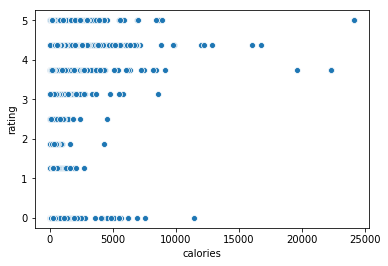

In [43]:
sns.scatterplot(nutritional2['calories'], nutritional2['rating'], x_jitter=.1, y_jitter=.1)

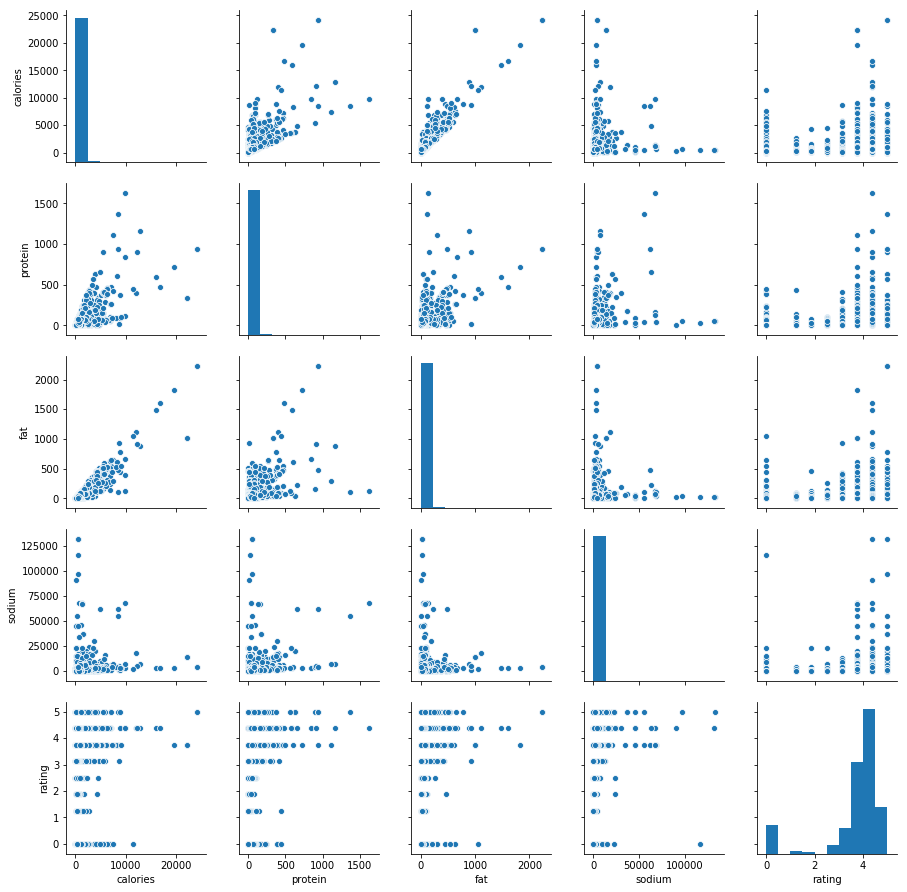

In [44]:
sns.pairplot(nutritional2)

Looking at the scatterplots, calories and fat appear to be correlated.  Sodium is also interesting in that it can be very high at 0 calories. I don't see a strong reason from this to try and include these in my model.

In [45]:
raw_data[raw_data['calories']<10]

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
285,Salted Water for Boiling,3.750,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
615,Za'atar,5.000,4.0,0.0,0.0,210.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
686,To Toast and Skin Hazelnuts,3.750,4.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
753,Turkey Giblet Stock,3.750,2.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1102,Szechuan Salt-Pepper,3.125,2.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1479,Cashew Milk and Cashew Flour,0.000,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1545,Herb Salt,0.000,2.0,0.0,0.0,2377.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1573,Turnip Greens Cooked in Rich Pork Stock,3.750,6.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1674,Sriracha Salt,0.000,0.0,0.0,0.0,2391.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1959,Vegetable-Herb Broth,0.000,2.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The 0 calorie recipes are seasoning mixes/broths/stocks.  

## Just for fun, try a forest...

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.33)

rfc = ensemble.RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

print(cross_val_score(rfc, X_test, y_test, cv=5))

y_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[0.92461832 0.93314231 0.92932187 0.92932187 0.92741165]
[[ 122  298]
 [  33 4783]]


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_30, y_all, test_size=0.33)

rfc = ensemble.RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

print(cross_val_score(rfc, X_test, y_test, cv=5))

y_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[0.92080153 0.92270992 0.91595033 0.92645654 0.916826  ]
[[  86  356]
 [  56 4738]]


In [48]:
# Try leaving in the calorie information
no_na = raw_data.dropna()
X_all = no_na.drop(['rating', 'title'], axis=1)
y_all = no_na['rating']
y_all = np.where(y_all <= 4, 0, 1)

sel = VarianceThreshold(threshold=.005)
X_new2 = sel.fit_transform(X_all)

X_new2_cols = []

for col in range(len(X_all.columns)):
    if sel.get_support()[col] == True:
        X_new2_cols.append(X_all.columns[col])

print(len(X_new2_cols))
X_new2_df = pd.DataFrame(X_new2, columns=X_new2_cols)


sel_30 = SelectKBest(score_func=f_classif, k=30)
X_30 = sel_30.fit_transform(X_new2_df, y_all)

X_30_cols = []

for col in range(len(X_new2_df.columns)):
    if sel_30.get_support()[col] == True:
        X_30_cols.append(X_new2_df.columns[col])

len(X_30_cols)

295


30

In [49]:
svc = SVC(gamma='auto')
svc.fit(X_30, y_all)

y_pred = svc.predict(X_30)
confusion_matrix(y_all, y_pred)


array([[1791, 5415],
       [1229, 7429]])

In [50]:
cross_val_score(svc, X_30, y_all, cv=5)

array([0.56836799, 0.58651119, 0.57012291, 0.57818411, 0.57471627])